Cargar las librerías y funciones

In [2]:
import numpy as np
from scipy.stats import genpareto
import seaborn as sns
import matplotlib.pyplot as plt

from anomalydetector_evt.utils.grimshaw import grimshaw
from anomalydetector_evt.utils.pot import POT

Prueba Grimshaw. Se graficarán la densidad de los datos reales (excesos) y luego se agregará la densidad de datos simulados con los parámetros estimados, $\gamma$ y $\sigma$, mediante Grimshaw.

In [3]:
p = 0.98

np.random.seed(123)
data = np.random.rayleigh(scale=10, size=10000)

t = np.sort(data)[int(p * data.size)]
peaks = data[data > t] - t

[]

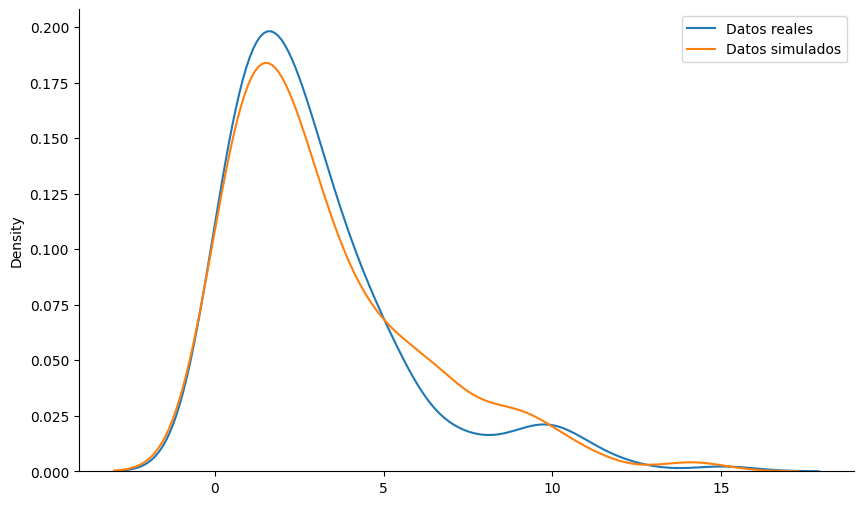

In [4]:
# Estimar los parámetros
gamma, sigma = grimshaw(peaks)

# Simular datos con los parámetros obtenidos
simulated = genpareto.rvs(c=gamma, loc=0, scale=sigma, size=len(peaks))

plt.figure(figsize=(10, 6))

# Graficar los valores reales vs los simulados
sns.kdeplot(peaks, label='Datos reales') 
sns.kdeplot(simulated, label='Datos simulados')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.plot()

Prueba POT. Ahora se calculará $t$, el valor desde el cual se consideran excesos y el umbral $z_q$ desde el que se considerá una anomalía. Se grafican estos valores en la curva de los datos simulados inicialmente.

[]

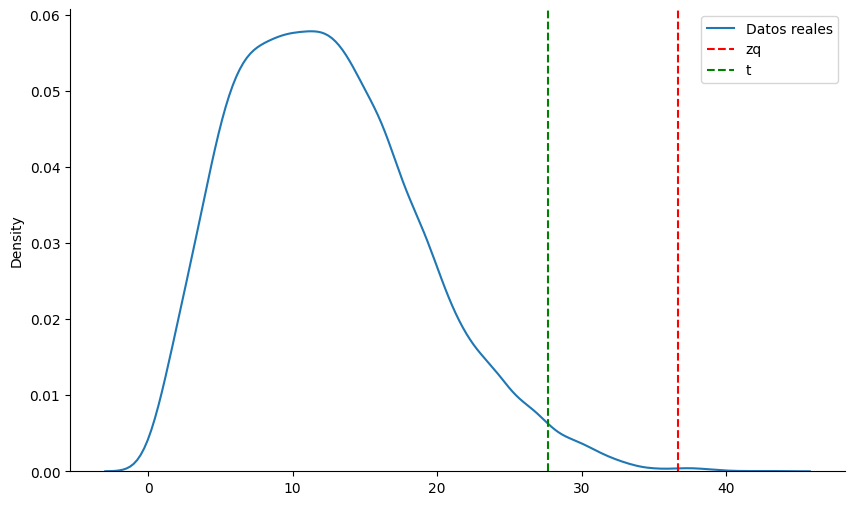

In [5]:
# Obtenemos:
# - zq: valor a partir del cual se considera una anomalía  
# - t: Valor a partir del cual de consideran peaks (cola de la distribución)
zq, t, peaks = POT(data=data, p=0.98, q=0.001) 

# Graficamos los datos reales y sus umbrales zq y t
plt.figure(figsize=(10, 6))
sns.kdeplot(data, label='Datos reales') 

plt.axvline(x=zq, color='red', linestyle='--', label='zq')
plt.axvline(x=t, color='green', linestyle='--', label='t')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.plot()